# Estudio sobre el SAT #

Se propone realizar un análisis sobre el estudio que recogió datos del SAT (un test estándar que se
utiliza ampliamente para admisiones en los Estados Unidos) por estados, combinados con otros datos.

El primer paso es la carga de los datos:

In [1]:
# http://vincentarelbundock.github.io/Rdatasets/datasets.html
import pandas as pd
df = pd.read_csv("SAT.csv").drop("Unnamed: 0",1)
df.head()

,state,expend,ratio,salary,frac,verbal,math,sat
0,Alabama,4.405,17.2,31.144,8,491,538,1029
1,Alaska,8.963,17.6,47.951,47,445,489,934
2,Arizona,4.778,19.3,32.175,27,448,496,944
3,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,California,4.992,24.0,41.078,45,417,485,902


## Puntuaciones: verbal, math y SAT ##

Una vez cargados los datos, se propone visualizar la escala de las diferentes puntuaciones (verbal, math y SAT total) y su comportamiento, utilizando histogramas:

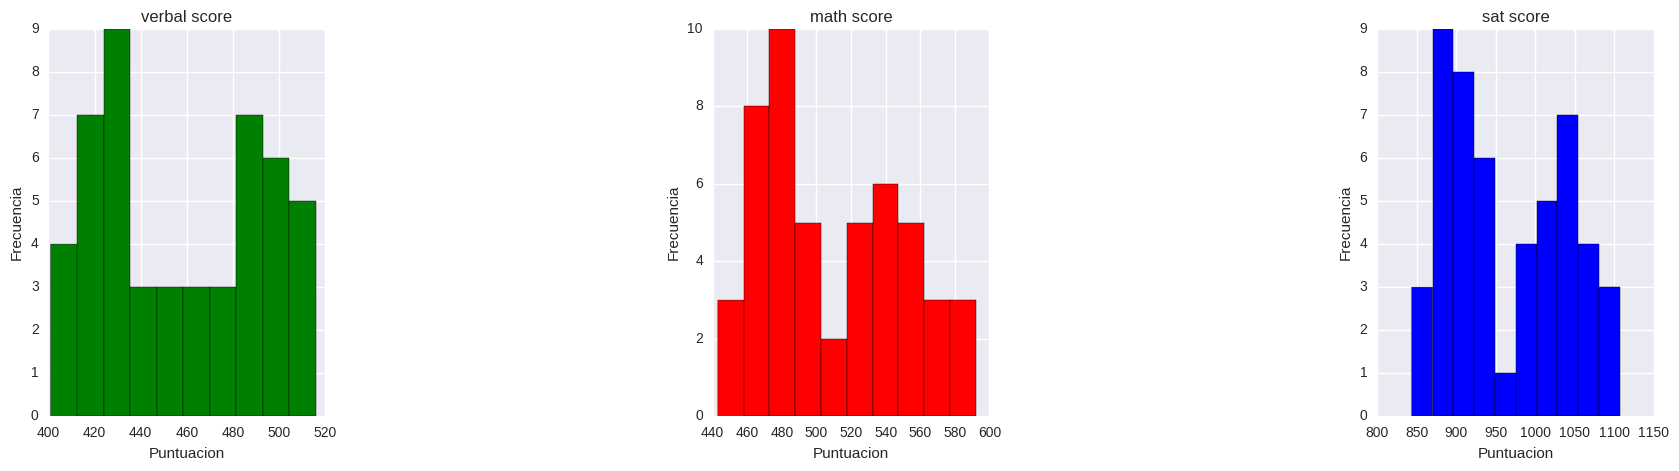

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cols = ["verbal", "math", "sat"]
colors = ["green", "red", "blue"]

pos = 1
plt.figure(figsize=(25,5))
for i in range(0, len(cols)):
    plt.subplot(161+pos)
    plt.hist(df[cols[i]], color = colors[i])
    plt.title(str(cols[i]) + " score")
    plt.xlabel("Puntuacion")
    plt.ylabel("Frecuencia")
    pos += 2

Como se puede observar, las puntuaciones verbal y matemática siguen una escala muy similar en su comienzo, aunque un tanto diferente en sus valores más altos:
* Escala puntuación verbal: sus valores se encuentran entre 400 y 520, encontrando sus puntos más altos entre los 410 y 430 puntos. Vista su distribución, se ve que se encuentran muchas más puntuaciones bajas o muy altas que puntuaciones medias.
* Escala puntuación matemática: sus valores se encuentran entre 440 y 590, con sus puntos más altos en putuaciones bajas (460-490). A diferencia de la puntuación verbal, es menos común encontrar puntuaciones muy altas, estando mucha cantidad de puntuaciones por debajo de la media.
* Escala puntuación total: entre 850 y 1100 (al ser la suma de las dos anteriores), las puntuaciones que más se dan son bajas mientras que hay pocas puntuaciones intermedias, aunque se encuentra cierta cantidad de puntuaciones altas o muy altas.

### Ranking puntuaciones ###
En cuanto al gasto en profesorado, el ranking es:

In [3]:
df_sorted_sat = df[["state","sat"]].sort_values("sat", ascending=False)
df_sorted_sat["RANK"] = range(1,df["sat"].size+1)
df_sorted_sat.set_index("RANK", inplace=True)
df_sorted_sat.iloc[:5,].append(df_sorted_sat.iloc[-5:,])

,state,sat
RANK,,
1,North Dakota,1107
2,Iowa,1099
3,Minnesota,1085
4,Utah,1076
5,Wisconsin,1073
46,Indiana,882
47,Pennsylvania,880
48,North Carolina,865
49,Georgia,854


En cuanto a puntuaciones, los estados mejor puntuados son: 
1. North Dakota
2. Iowa
3. Minnesota
4. Utah
5. Wisconsin

Mientas que los que menos puntuación han conseguido son: 
1. South Carolina
2. Georgia
3. North Carolina
4. Pennsylvania
5. Indiana

## Gasto: expend, salary y ratio ##

Una vez conocidas las escalas de las puntuaciones, es momento de buscar los estados que más (y menos) gastan, ordenándolos por gasto por alumno, y mostrando con éste el salario anual del profesorado y el ratio alumno/profesor.

Debido a la diferencia entre la importancia de las variables involucradas y la falta de información (número de alumnos o de profesores en cada estado), se realizarán análisis por gasto de alumno y gasto en profesorado de forma diferenciada.

### Gasto por alumno ###

In [4]:
df_sorted_expend = df[["state","expend"]].sort_values("expend", ascending=False)
df_sorted_expend["RANK"] = range(1,df["expend"].size+1)
df_sorted_expend.set_index("RANK", inplace=True)
df_sorted_expend.iloc[:5,].append(df_sorted_expend.iloc[-5:,])

,state,expend
RANK,,
1,New Jersey,9.774
2,New York,9.623
3,Alaska,8.963
4,Connecticut,8.817
5,Rhode Island,7.469
46,Alabama,4.405
47,Tennessee,4.388
48,Idaho,4.210
49,Mississippi,4.080


En cuanto a gasto por alumno, los estados que más gastan son: 
1. New Jersey
2. New York
3. Alaska
4. Connecticut
5. Rhode Island

Mientas que los que menos gastan por alumnos son: 
1. Utah
2. Mississippi
3. Idaho
4. Tennessee
5. Alabama

### Gasto en profesorado ###
En cuanto al gasto en profesorado, el ranking es:

In [5]:
df_sorted_salary = df[["state","salary"]].sort_values("salary", ascending=False)
df_sorted_salary["RANK"] = range(1,df["salary"].size+1)
df_sorted_salary.set_index("RANK", inplace=True)
df_sorted_salary.iloc[:5,].append(df_sorted_salary.iloc[-5:,])

,state,salary
RANK,,
1,Connecticut,50.045
2,Alaska,47.951
3,New York,47.612
4,New Jersey,46.087
5,Pennsylvania,44.510
46,Oklahoma,28.172
47,Mississippi,26.818
48,Louisiana,26.461
49,North Dakota,26.327


En cuanto a gasto en profesorado, los estados que más gastan son: 
1. Connecticut
2. Alaska
3. New York 
4. New Jersey
5. Pennsylvania

Mientas que los que menos gastan en profesorado son: 
1. South Dakota
2. North Dakota
3. Louisiana
4. Mississippi
5. Oklahoma

Comparando ambos gastos, se puede ver que estados como Connecticut, New Jersey, New York o Alaska se encuentran entre los que más "invierten" en educación, mientras que el único que coincide en ambos rankings en cuanto a menor gasto es Mississippi.

Curiosamente se da el caso que, North Dakota, siendo el segundo estado que menos gasta en su profesorado, es el que mejor puntuación recibe. Además, ninguno de los estados que más invierten tanto en profesorado como en los alumnos se ve entre los 5 mejores en cuanto a puntuación. Incluso Pennsylvania, el 5º estado que más invierte en profesorado es el 4º peor estado en cuanto a puntuación. Esto ya comienza a indicar que el gasto puede que no esté directamente relacionado con los resultados, ya que el gasto en educación de los estados mencionados anteriormente no corresponde con puntuaciones acorde a ese gasto.

## Relacionando gasto con resultados ##

Una vez analizados los resultado y los gastos por separado, es momento de analizarlos conjuntamente, para ver si puede existir algún tipo de correlación. Para ello se va a mostrar gráficamente la correlación entre variables económicas (sin el ratio) y las de puntuación, y se realizará una recta de regresión para analizar esa correlación.

Correlacion (verbal,expend): -0.410049872133
R-squared (verbal,expend): 0.168140897636
-------------
Correlacion (verbal,salary): -0.476963635342
R-squared (verbal,salary): 0.227494309438
-------------
Correlacion (math,expend): -0.349414091107
R-squared (math,expend): 0.122090207064
-------------
Correlacion (math,salary): -0.401312816829
R-squared (math,salary): 0.161051976951
-------------
Correlacion (sat,expend): -0.380537003305
R-squared (sat,expend): 0.144808410884
-------------
Correlacion (sat,salary): -0.439883381442
R-squared (sat,salary): 0.193497389269
-------------


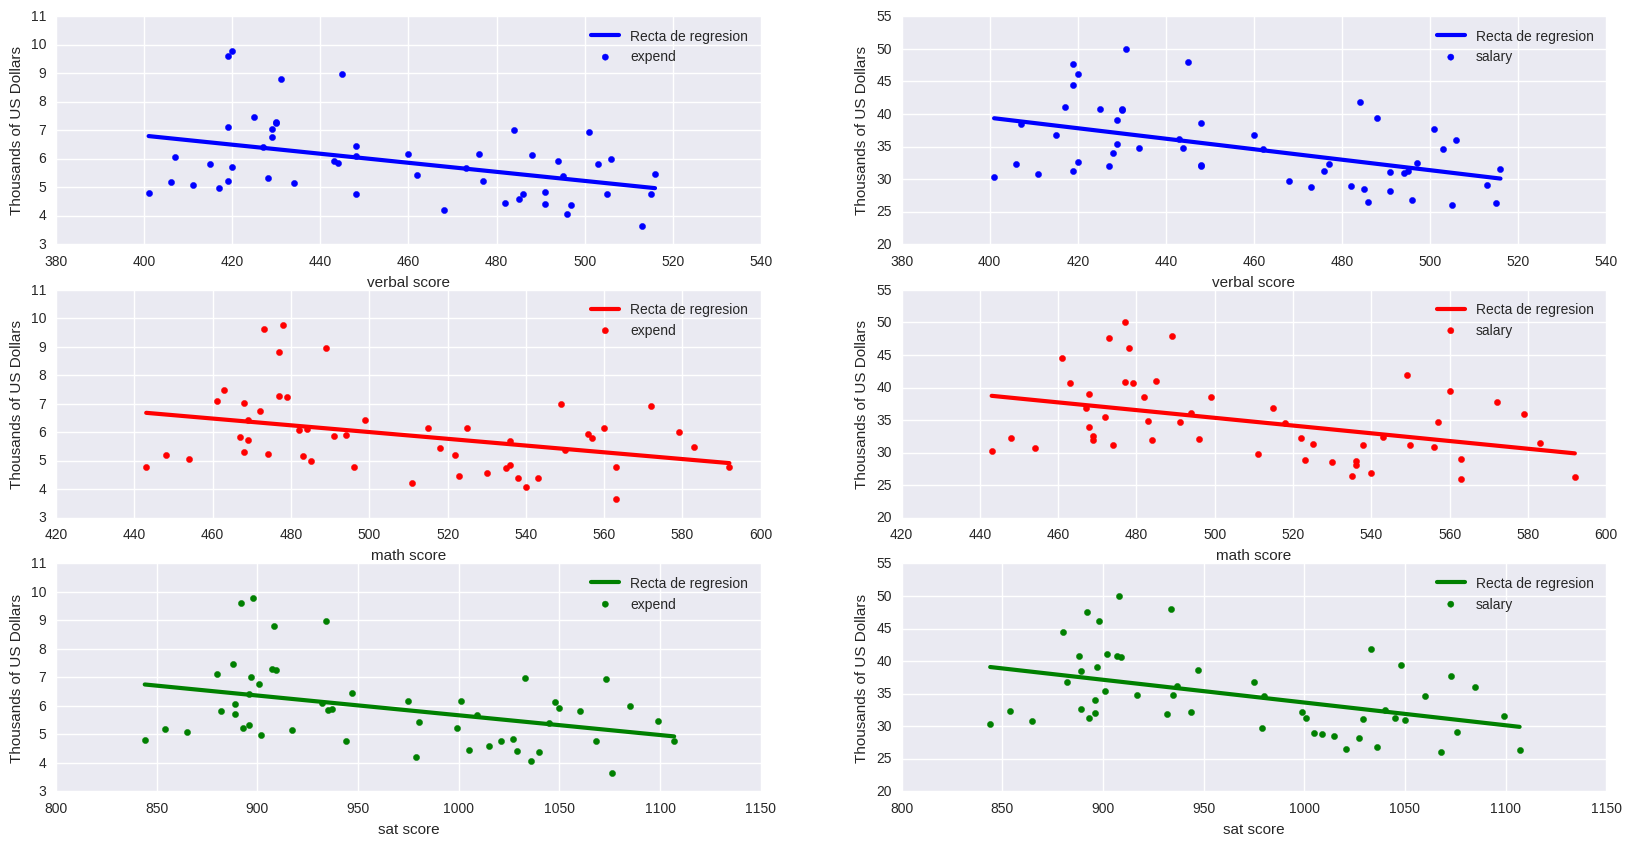

In [6]:
from sklearn import linear_model
import numpy as np

plt.figure(figsize=(20,10))

scores = ["verbal", "math", "sat"]
costs = ["expend", "salary"]
colors = ["blue", "red" ,"green"]

pos = 0
for i in range(0, len(scores)):
    for j in range(0, len(costs)):
        plt.subplot(321+pos)
        a = df[scores+costs].sort_values(scores[i], ascending=True)
        #print("Correlacion (" + scores[i] + "," + costs[j] + "): " + str(df[scores[i]].corr(df[costs[j]])))
        print("Correlacion (" + scores[i] + "," + costs[j] + "): " + str(df[costs[j]].corr(df[scores[i]])))
        plt.scatter(a[scores[i]], a[costs[j]], color=colors[i])
        plt.xlabel(scores[i] + " score")
        plt.ylabel("Thousands of US Dollars")
        # Creamos un modelo de regresión "vacío":
        clf = linear_model.LinearRegression()
        # Entrenamos el modelo tomando todos los datos:
        x1 = a[scores[i]]
        X = x1[:, np.newaxis] # Necesario porque fit() espera una matriz.
        y = a[costs[j]]
        clf.fit(X, y)

        # El modelo.
        plt.plot(X, clf.predict(X), color = colors[i], linewidth=3)
        print("R-squared (" + scores[i] + "," + costs[j] + "): "+ str(clf.score(X, y)))
        print("-------------")

        
        plt.legend(["Recta de regresion",costs[j]])
    
        pos += 1

Las correlaciones obtenidas son negativas, es decir, que cuanto más incrementa una variable, la otra decrece. Sin embargo, son valores de correlación bajos como para asegurar con certeza que se cumpla ese comportamiento.

Además, los datos obtenidos se presentan muy dispersos, al tratar de hacer un modelo de recta de regresión se obtienen valores R-squared muy bajos, por lo que tampoco se puede decir que sigan una correlación ambas variables (para todas las analizadas).

## Agrupando por participación ##

Se puede agrupar los diferentes estados según el porcetaje de alumnos que se han presentado a realizar el SAT. Tras agruparlos, se toman las variables económicas de gasto en profesorado y en alumnos, y se agrupan en una única variable, llamada "salary&expend". Posteriormente, se va a realizar la media de esa variable junto con las variables económicas mencionadas y el SAT.

Universidades con mayor gasto
      salary&expend   expend   salary      sat
frac                                          
81         58.86200  8.81700  50.0450   908.00
74         57.23500  9.62300  47.6120   892.00
70         49.06425  7.55275  41.5115   900.25
80         48.08200  7.28700  40.7950   907.00
64         47.90600  7.24500  40.6610   909.00
47         46.67950  7.09250  39.5870   913.50
45         46.07000  4.99200  41.0780   902.00
13         45.56700  6.13600  39.4310  1048.00
51         44.99100  6.43600  38.5550   947.00
57         44.59600  6.07800  38.5180   889.00
-----------------
Universidades con menor gasto
      salary&expend  expend  salary          sat
frac                                            
10           37.445   6.160  31.285  1001.000000
27           36.953   4.778  32.175   944.000000
12           36.865   4.388  32.477  1040.000000
60           35.870   5.077  30.793   865.000000
8            35.549   4.405  31.144  1029.000000
21           34

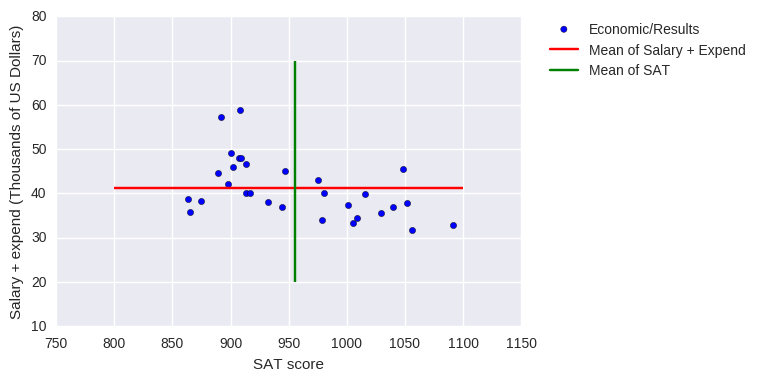

In [12]:
df["salary&expend"] = df["expend"] + df["salary"]
by_frac = df.groupby("frac")
ordered_frac = by_frac[["salary&expend", "expend", "salary", "sat"]].mean().sort_values(["salary&expend","expend",
                                                                          "salary"], ascending=False)
plt.scatter(ordered_frac["sat"], ordered_frac["salary&expend"])
plt.ylabel("Salary + expend (Thousands of US Dollars)")
plt.xlabel("SAT score")
plt.hlines(ordered_frac["salary&expend"].mean(), 800, 1100, color = "red")
plt.vlines(ordered_frac["sat"].mean(), 20, 70, color = "green")
plt.legend(["Economic/Results","Mean of Salary + Expend", "Mean of SAT"], 
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print("Universidades con mayor gasto")
print(ordered_frac.head(10))
print("-----------------")
print("Universidades con menor gasto")
print(ordered_frac.tail(10))

Ordenando los grupos según gasto económico, se puede obtener las siguientes observaciones:
1. Los grupos que más porcentaje de alumnos presentan son los que más "invierten" en cuanto a gasto. De forma análoga, eso ocurre con con los que menos alumnos presentan, menos gasto en educación. Este último caso se ve muy claro: de los últimos 6 grupos en cuanto a gasto, ninguno presenta más del 21% de sus alumnos.
2. Los grupos se han ordenado primero en gasto en alumnos y después por gasto en profesorado. Por lo general la media de gasto en alumnos es directamente proporcional a la del gasto en profesorado (más en alumnos, más en profesores o menos en alumnos, menos en profesores). Sin embargo hay casos excepcionales como el grupo que presenta un 45% de los alumnos.
3. La gráfica muestra que, en menores gastos, se encuentras las mejores y peores puntuaciones, pero aparecen más notas muy altas que muy bajas. Al contrario, los datos que representan un mayor gasto muestran una puntuación muy por debajo de la media (la media de SAT se representa por la barra horizontal).
4. El cuadrante sureste es el más óptimo, ya que contiene las mejores puntuaciones con el menor gasto. Análogamente, hay una gran cantidad de puntos en el cuadrante noroeste, que es el que menor puntuacion tiene pero más gasto.